In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

In [71]:
df = pd.read_csv("student-por 2.csv")

In [72]:
df.shape

(649, 33)

In [73]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [74]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [75]:
print(df.isnull().sum().sum())

0


In [76]:
l_encoder=LabelEncoder()

In [77]:
object_col=[col for col in df.columns if df[col].dtype=="object"]

In [78]:
df_copy=df.copy()

In [79]:
for col in object_col:
    df_copy[col]=l_encoder.fit_transform(df_copy[col])

In [80]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      649 non-null    int64
 1   sex         649 non-null    int64
 2   age         649 non-null    int64
 3   address     649 non-null    int64
 4   famsize     649 non-null    int64
 5   Pstatus     649 non-null    int64
 6   Medu        649 non-null    int64
 7   Fedu        649 non-null    int64
 8   Mjob        649 non-null    int64
 9   Fjob        649 non-null    int64
 10  reason      649 non-null    int64
 11  guardian    649 non-null    int64
 12  traveltime  649 non-null    int64
 13  studytime   649 non-null    int64
 14  failures    649 non-null    int64
 15  schoolsup   649 non-null    int64
 16  famsup      649 non-null    int64
 17  paid        649 non-null    int64
 18  activities  649 non-null    int64
 19  nursery     649 non-null    int64
 20  higher      649 non-null    int6

In [81]:
corr=df.corr(numeric_only=True)
corr["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
studytime     0.249789
Medu          0.240151
Fedu          0.211800
famrel        0.063361
goout        -0.087641
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
failures     -0.393316
Name: G3, dtype: float64

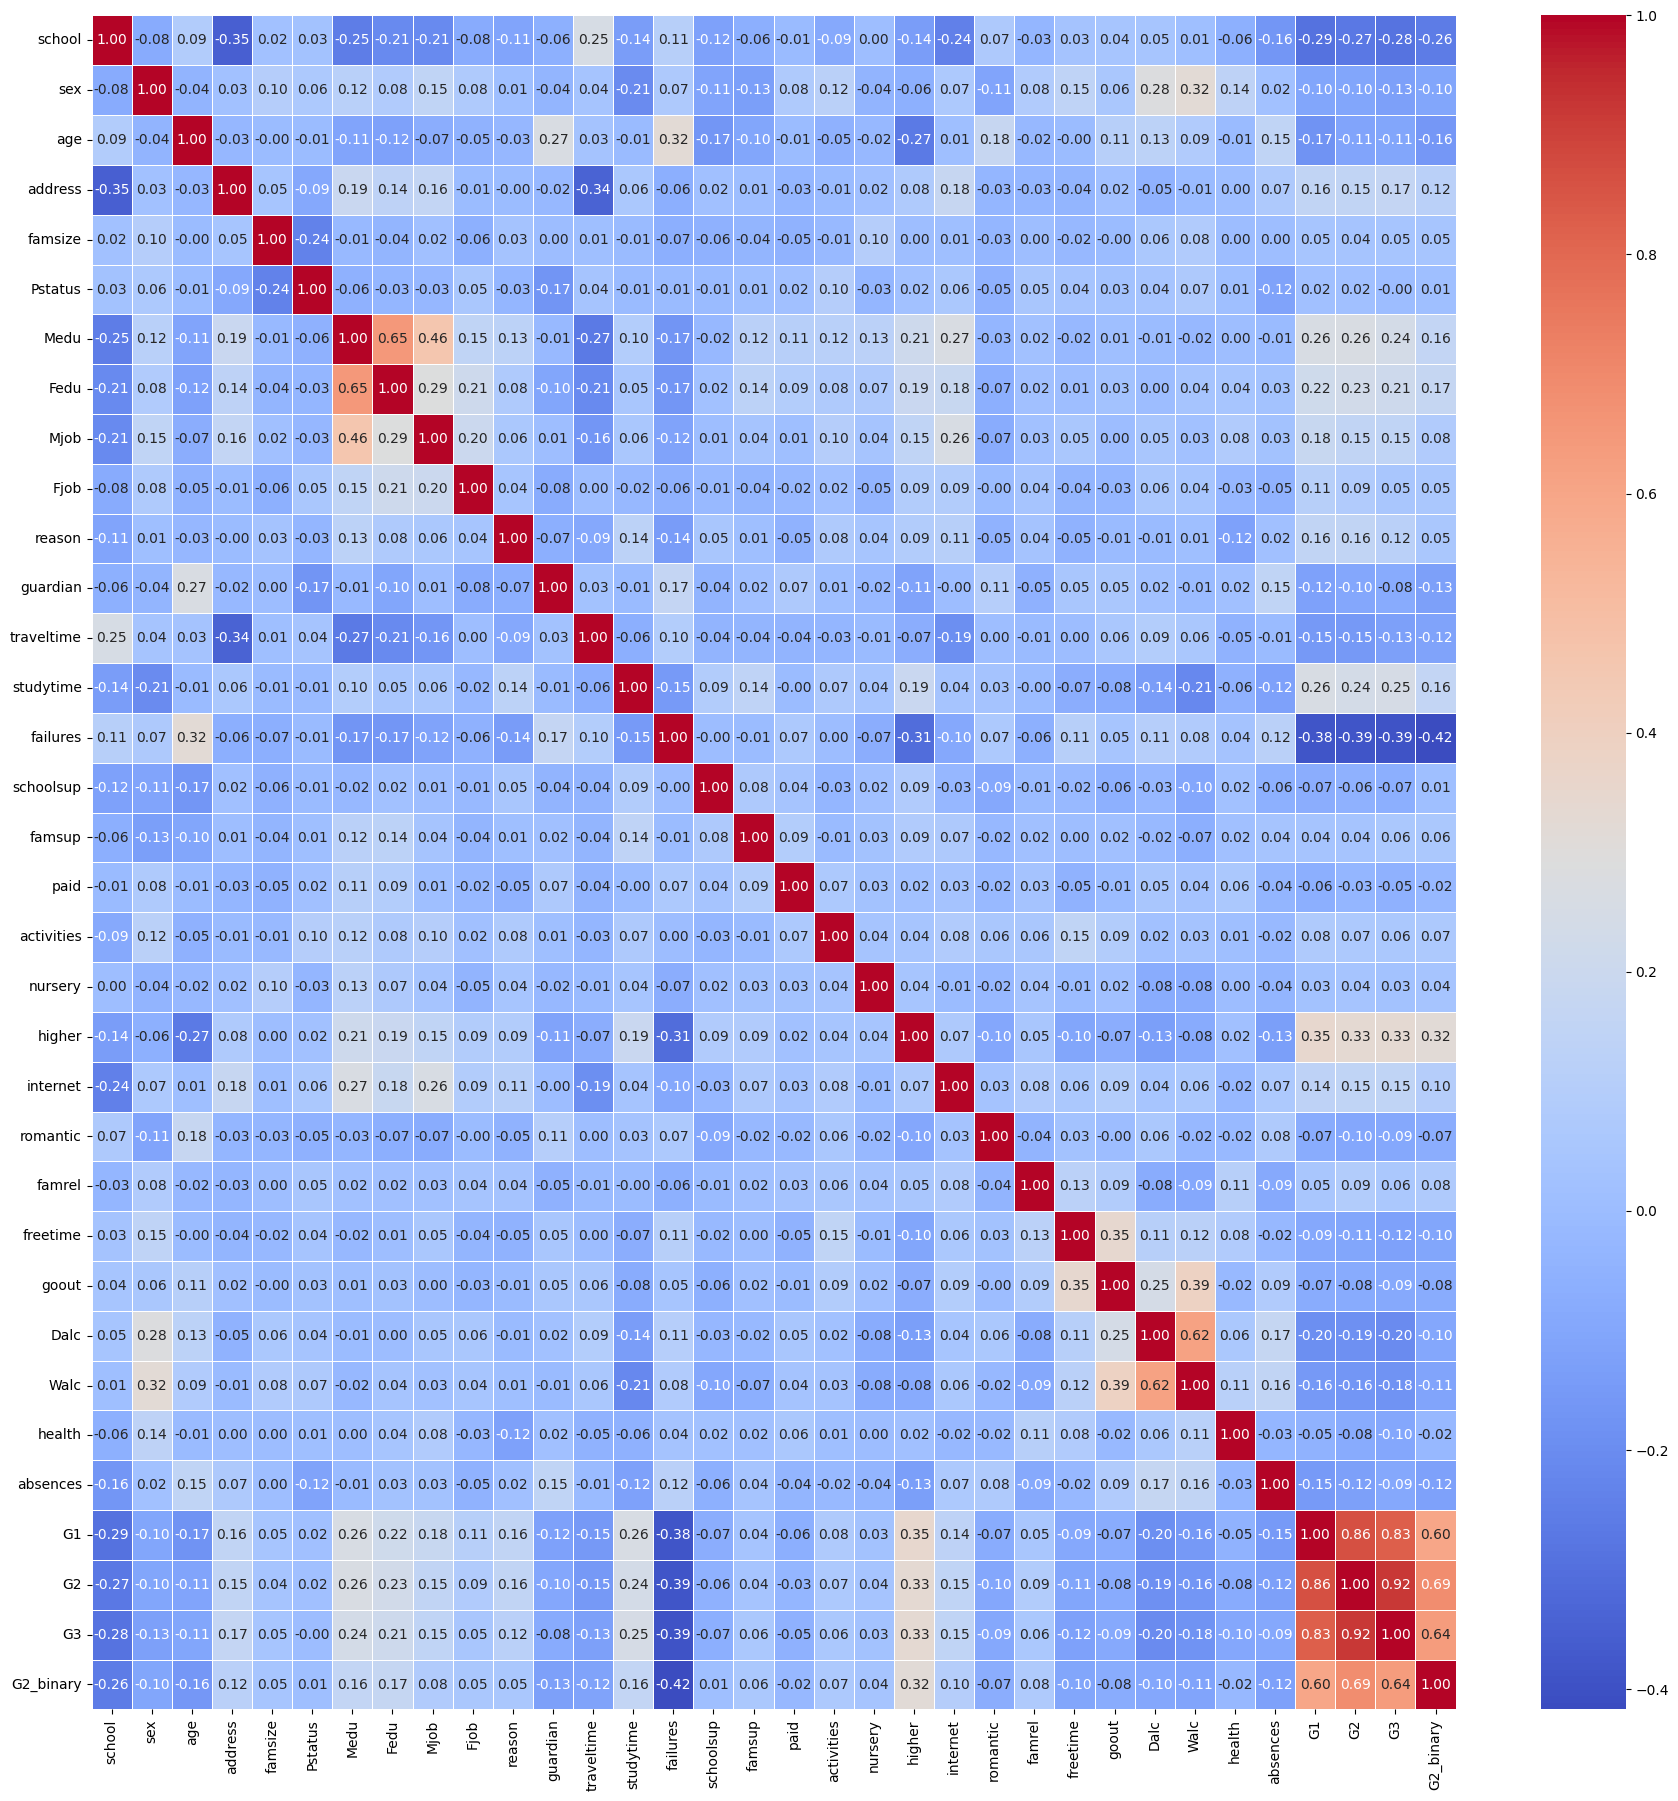

In [162]:
plt.figure(figsize=(22,22))
sns.heatmap(df_copy.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.7)
plt.show()

<Axes: xlabel='G3', ylabel='Density'>

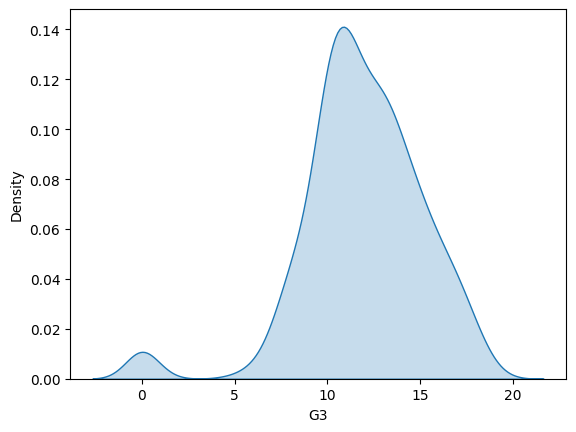

In [83]:
sns.kdeplot(df_copy["G3"],fill=True)

In [164]:
#X=df_copy.drop(["G3","G2"],axis=1)
#y=df_copy["G3"]
df_copy["G2_binary"] = np.where(df_copy["G2"] >= 10, 1, 0)   # veya >=60
X = df_copy.drop(columns=["G3", "G2"])  
y = df_copy["G3"]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df_copy["school"])

In [166]:
li_reg=LinearRegression()
li_reg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

# --- Tahminler ---
y_score = li_reg.predict(X_test)

# --- Temel metrikler ---
mae  = mean_absolute_error(y_test, y_score)
mse  = mean_squared_error(y_test, y_score)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_score)
mape = (np.abs((y_test - y_score) / np.where(y_test == 0, 1e-9, y_test))).mean() * 100
medae = median_absolute_error(y_test, y_score)
evs  = explained_variance_score(y_test, y_score)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

# --- Raporlama ---
print("-" * 45)
print(f"MAE   : {mae:.4f}")
print(f"MSE   : {mse:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"R²    : {r2:.4f}")
print(f"Adj R²: {adj_r2:.4f}")
print(f"MAPE  : {mape:.2f}%")
print(f"MedAE : {medae:.4f}")
print(f"EVS   : {evs:.4f}")
print("-" * 45)

---------------------------------------------
MAE   : 0.9183
MSE   : 1.3690
RMSE  : 1.1700
R²    : 0.7870
Adj R²: 0.7168
MAPE  : 7.92%
MedAE : 0.7320
EVS   : 0.7880
---------------------------------------------
